##향수 추천 시스템
###[1] 프로젝트 개요
- 목표: 향수 별 Aroma Note 데이터의 텍스트 분석을 통한 사용자 취향에 최적화된 향수를 제안하는 추천시스템 생성 및 시각화
- 수행 기간: 25.12.22 ~26.02.02

### [2] 데이터 전처리
- 향수 데이터 불러오기
- 향수 데이터(fra_clean.csv) 전처리
  - 칼럼 drop: perfumer 행 2개
  - Top/Middle/Base ‘,’ 떼서 따로 놓기
  - mainaccord -> category로 수동 매핑
- EDA 확인
  - MainAccord 별 분포 Top 10 시각화
  - Main Accord 통합 분포 Top 15
  - Category 별 분포
  - Category 별 통합 분포
- 추가적인 수동 매핑 진행
  - 사용자로부터 입력받을 값의 다양성을 높이기 위해 추가적인 데이터 확보 및 수동 매핑 수행
  - 날씨, 무드 테이블 수동 매핑
    - 무드 데이블 생성 시 EGG 데이터 추가 수집 후 수동 매핑 수행
  - 문제 상황 발생: 사용자가 선택하지 않은 날씨가 높은 비중을 차지하는 경우에도 추천되는 상황이 발생
    - 사용자가 선택한 날씨에 가중치 부여 -> 해당 날씨가 가장 높은 비중을 차지하는 경우에만 보이도록 필터링 수행

In [ ]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data/vacation project/fra_cleaned.csv', encoding='latin1', sep=';')
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [ ]:
df.drop(columns = ['Perfumer1', 'Perfumer2', 'Year'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           24063 non-null  object
 1   Perfume       24063 non-null  object
 2   Brand         24063 non-null  object
 3   Country       24063 non-null  object
 4   Gender        24063 non-null  object
 5   Rating Value  24063 non-null  object
 6   Rating Count  24063 non-null  int64 
 7   Top           24063 non-null  object
 8   Middle        24063 non-null  object
 9   Base          24063 non-null  object
 10  mainaccord1   24063 non-null  object
 11  mainaccord2   24050 non-null  object
 12  mainaccord3   23949 non-null  object
 13  mainaccord4   23675 non-null  object
 14  mainaccord5   23082 non-null  object
dtypes: int64(1), object(14)
memory usage: 2.8+ MB


In [ ]:
accord_cols = ['mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5']
df[accord_cols] = df[accord_cols].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           24063 non-null  object
 1   Perfume       24063 non-null  object
 2   Brand         24063 non-null  object
 3   Country       24063 non-null  object
 4   Gender        24063 non-null  object
 5   Rating Value  24063 non-null  object
 6   Rating Count  24063 non-null  int64 
 7   Top           24063 non-null  object
 8   Middle        24063 non-null  object
 9   Base          24063 non-null  object
 10  mainaccord1   24063 non-null  object
 11  mainaccord2   24063 non-null  object
 12  mainaccord3   24063 non-null  object
 13  mainaccord4   24063 non-null  object
 14  mainaccord5   24063 non-null  object
dtypes: int64(1), object(14)
memory usage: 2.8+ MB


In [ ]:
# Rating Value: 쉼표 -> 점으로 바꾸고 숫자로 변환
df['Rating Value'] = df['Rating Value'].astype(str).str.replace(',', '.', regex=False)
df['Rating Value'] = df['Rating Value'].astype(float)

# Perfume Name -> 하이픈 제거
df['Perfume'] = df['Perfume'].astype(str).str.replace('-', ' ')

df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Top,Middle,Base,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento overdose pride edition,xerjoff,Italy,unisex,1.42,201,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2024,jean-paul-gaultier,France,women,1.86,70,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2023,jean-paul-gaultier,France,unisex,1.91,285,"blood orange, yuzu","neroli, orange blossom","musk, white woods",citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride edition man,bruno-banani,Germany,men,1.92,59,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",fruity,nutty,woody,tropical,None
4,https://www.fragrantica.com/perfume/jean-paul-...,le male pride collector,jean-paul-gaultier,France,men,1.93,632,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [ ]:
def split_and_clean_notes(note_series):
  return (
      note_series
      .fillna("")
      .str.lower()
      .str.split(",")
      .apply(lambda notes:
             [n.strip() for n in notes if n.strip() != ""])
  )

df['Top'] = split_and_clean_notes(df['Top'])
df['Middle'] = split_and_clean_notes(df['Middle'])
df['Base'] = split_and_clean_notes(df['Base'])

In [ ]:
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Top,Middle,Base,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento overdose pride edition,xerjoff,Italy,unisex,1.42,201,"[fruity notes, aldehydes, green notes]","[bulgarian rose, egyptian jasmine, lily-of-the...","[eucalyptus, pine]",rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2024,jean-paul-gaultier,France,women,1.86,70,"[yuzu, citruses]","[orange blossom, neroli]","[musk, blonde woods]",citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2023,jean-paul-gaultier,France,unisex,1.91,285,"[blood orange, yuzu]","[neroli, orange blossom]","[musk, white woods]",citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride edition man,bruno-banani,Germany,men,1.92,59,"[guarana, grapefruit, red apple]","[walnut, lavender, guava]","[vetiver, benzoin, amber]",fruity,nutty,woody,tropical,None
4,https://www.fragrantica.com/perfume/jean-paul-...,le male pride collector,jean-paul-gaultier,France,men,1.93,632,"[mint, lavender, cardamom, artemisia, bergamot]","[caraway, cinnamon, orange blossom]","[vanilla, sandalwood, amber, cedar, tonka bean]",aromatic,warm spicy,fresh spicy,cinnamon,vanilla


### [2-1] Category 수동 매핑

- Floral
- Spicy
- Sweet
- Fresh(citrus, fresh한거 여기에)
- Aquatic(watery, airy스러운거 여기에)
- Herbal(green, herbal스러운거 여기에) -> 담당자가 너무 많다 싶으면 green, herbal으로 나누기
- Woody(wood, earthy한거 여기에)
- Musky(Animalic한거)
- Fruity (tropical도 여기)
- Smoky
- Synthetic (Clean한거)
- Industrial
- Boozy(Alcohol)
- Others (여기는 None만 들어감)


In [ ]:
df['mainaccord1'].unique()

array(['rose', 'citrus', 'fruity', 'aromatic', 'white floral', 'woody',
       'powdery', 'leather', 'green', 'rubber', 'floral', 'ozonic',
       'vinyl', 'musky', 'yellow floral', 'earthy', 'warm spicy',
       'fresh spicy', 'fresh', 'sweet', 'amber', 'vanilla', 'tropical',
       'lavender', 'almond', 'violet', 'iris', 'cherry', 'aquatic',
       'aldehydic', 'animalic', 'oud', 'marine', 'metallic', 'lactonic',
       'coffee', 'tuberose', 'caramel', 'smoky', 'coconut', 'soft spicy',
       'patchouli', 'sand', 'anis', 'mossy', 'honey', 'mineral',
       'chocolate', 'cacao', 'coca-cola', 'tobacco', 'savory', 'plastic',
       'herbal', 'nutty', 'soapy', 'balsamic', 'salty', 'asphault',
       'champagne', 'beeswax', 'cinnamon', 'whiskey', 'rum',
       'industrial glue', 'oriental'], dtype=object)

In [ ]:
df['mainaccord2'].unique()

array(['woody', 'white floral', 'nutty', 'warm spicy', 'citrus', 'amber',
       'fruity', 'musky', 'tropical', 'oud', 'fresh spicy', 'mineral',
       'powdery', 'aquatic', 'vanilla', 'mossy', 'aldehydic', 'green',
       'aromatic', 'fresh', 'smoky', 'almond', 'sweet', 'floral',
       'tuberose', 'rum', 'animalic', 'lactonic', 'rose', 'yellow floral',
       'caramel', 'marine', 'earthy', 'patchouli', 'iris', 'herbal',
       'ozonic', 'leather', 'tobacco', 'lavender', 'violet', 'metallic',
       'coffee', 'savory', 'balsamic', 'anis', 'soft spicy', 'cinnamon',
       'honey', 'salty', 'coconut', 'cherry', 'chocolate', 'camphor',
       'hot iron', 'whiskey', 'asphault', 'champagne', 'cacao', 'None',
       'cannabis', 'coca-cola', 'soapy', 'vodka', 'sand', 'clay', 'wine',
       'beeswax', 'brown scotch tape', 'spicy', 'gourmand', 'oily'],
      dtype=object)

In [ ]:
df['mainaccord3'].unique()

array(['fruity', 'sweet', 'woody', 'fresh spicy', 'fresh', 'citrus',
       'floral', 'violet', 'rose', 'aromatic', 'paper', 'lavender',
       'warm spicy', 'musky', 'amber', 'metallic', 'animalic', 'powdery',
       'aquatic', 'white floral', 'oud', 'leather', 'earthy', 'cinnamon',
       'caramel', 'tropical', 'almond', 'ozonic', 'green',
       'yellow floral', 'vanilla', 'anis', 'smoky', 'None', 'honey',
       'tuberose', 'soft spicy', 'mossy', 'lactonic', 'marine', 'whiskey',
       'iris', 'patchouli', 'tobacco', 'cacao', 'coffee', 'cherry',
       'balsamic', 'salty', 'coconut', 'conifer', 'chocolate', 'mineral',
       'herbal', 'beeswax', 'champagne', 'aldehydic', 'vodka', 'nutty',
       'wine', 'rum', 'camphor', 'cannabis', 'sand', 'coca-cola',
       'savory', 'soapy', 'bitter', 'alcohol', 'vinyl', 'sour', 'plastic',
       'spicy'], dtype=object)

In [ ]:
df['mainaccord4'].unique()

array(['aromatic', 'fresh', 'fresh spicy', 'tropical', 'cinnamon',
       'soapy', 'warm spicy', 'sweet', 'fruity', 'powdery', 'ozonic',
       'floral', 'leather', 'woody', 'musky', 'citrus', 'coffee',
       'earthy', 'oud', 'marine', 'white floral', 'rose', 'green',
       'vanilla', 'herbal', 'animalic', 'patchouli', 'lavender', 'amber',
       'None', 'soft spicy', 'aldehydic', 'aquatic', 'mossy', 'nutty',
       'cherry', 'violet', 'anis', 'yellow floral', 'cacao', 'cannabis',
       'smoky', 'coconut', 'almond', 'camphor', 'caramel', 'chocolate',
       'mineral', 'iris', 'balsamic', 'honey', 'tuberose', 'rum',
       'champagne', 'salty', 'tobacco', 'alcohol', 'metallic', 'sand',
       'lactonic', 'wine', 'whiskey', 'terpenic', 'vodka', 'beeswax',
       'conifer', 'savory', 'oriental', 'creamy', 'sour'], dtype=object)

In [ ]:
df['mainaccord5'].unique()

array(['floral', 'musky', 'None', 'vanilla', 'green', 'aromatic', 'fresh',
       'metallic', 'aquatic', 'citrus', 'sweet', 'amber', 'violet',
       'fresh spicy', 'oud', 'powdery', 'white floral', 'cannabis',
       'soft spicy', 'balsamic', 'leather', 'coffee', 'woody', 'soapy',
       'lactonic', 'nutty', 'rose', 'fruity', 'lavender', 'patchouli',
       'warm spicy', 'conifer', 'tropical', 'tobacco', 'smoky', 'iris',
       'herbal', 'marine', 'mossy', 'almond', 'earthy', 'animalic',
       'tuberose', 'honey', 'aldehydic', 'cinnamon', 'mineral', 'ozonic',
       'cacao', 'yellow floral', 'caramel', 'anis', 'terpenic', 'coconut',
       'cherry', 'camphor', 'whiskey', 'sand', 'salty', 'chocolate',
       'gasoline', 'beeswax', 'bitter', 'champagne', 'sour', 'rum',
       'oily', 'savory', 'alcohol', 'clay', 'vodka', 'wine', 'vinyl',
       'hot iron', 'asphault', 'oriental', 'spicy', 'gourmand'],
      dtype=object)

In [ ]:
accord_to_group = {
    # Floral
    'rose': 'Floral',
    'white floral': 'Floral',
    'floral': 'Floral',
    'yellow floral': 'Floral',
    'violet': 'Floral',
    'iris': 'Floral',
    'tuberose': 'Floral',

    # Fresh
    'citrus': 'Fresh',
    'fresh': 'Fresh',
    'sour' : 'Fresh',

    # Fruity
    'fruity': 'Fruity',
    'tropical': 'Fruity',
    'cherry': 'Fruity',
    'coconut': 'Fruity',

    # Herbal
    'aromatic': 'Herbal',
    'green': 'Herbal',
    'herbal': 'Herbal',
    'mossy': 'Herbal',
    'cannabis' : 'Herbal',
    'camphor' : 'Herbal',
    'bitter' : 'Herbal',
    'terpenic' : 'Herbal',
    'lavender': 'Herbal',

    # Woody
    'woody': 'Woody',
    'earthy': 'Woody',
    'oud': 'Woody',
    'clay' : 'Woody',
    'conifer' : 'Woody',
    'paper' : 'Woody',
    'patchouli': 'Woody',

    # Musky
    'musky': 'Musky',
    'powdery': 'Musky',
    'animalic': 'Musky',
    'beeswax': 'Musky',

    # Aquatic
    'aquatic': 'Aquatic',
    'ozonic': 'Aquatic',
    'marine': 'Aquatic',
    'salty': 'Aquatic',
    'sand': 'Aquatic',
    'mineral': 'Aquatic',

    # Spicy
    'warm spicy': 'Spicy',
    'fresh spicy': 'Spicy',
    'soft spicy': 'Spicy',
    'anis': 'Spicy',
    'cinnamon': 'Spicy',
    'savory': 'Spicy',
    'spicy' : 'Spicy',

    # Sweet
    'sweet': 'Sweet',
    'amber': 'Sweet',
    'vanilla': 'Sweet',
    'almond': 'Sweet',
    'lactonic': 'Sweet',
    'coffee': 'Sweet',
    'caramel': 'Sweet',
    'honey': 'Sweet',
    'chocolate': 'Sweet',
    'cacao': 'Sweet',
    'coca-cola': 'Sweet',
    'nutty': 'Sweet',
    'gourmand' : 'Sweet',
    'creamy' : 'Sweet',
    'oriental': 'Sweet',

    # Smoky
    'smoky': 'Smoky',
    'tobacco': 'Smoky',
    'balsamic': 'Smoky',
    'leather': 'Smoky',

    # Synthetic => Clean, Aldehyde
    'vinyl': 'Synthetic',
    'metallic': 'Synthetic',
    'plastic': 'Synthetic',
    'aldehydic': 'Synthetic',
    'soapy': 'Synthetic',
    'hot iron' : 'Synthetic',
    'oily' : 'Synthetic',

    # Industrial
    'rubber': 'Industrial',
    'industrial glue': 'Industrial',
    'asphault': 'Industrial',
    'brown scotch tape' : 'Industrial',
    'gasoline' : 'Industrial',

    # Boozy
    'champagne': 'Boozy',
    'whiskey': 'Boozy',
    'rum': 'Boozy',
    'vodka' : 'Boozy',
    'wine' : 'Boozy',
    'alcohol' : 'Boozy',

    # Others
    'None' : 'Others'
}

In [ ]:
def map_category_final_v3(accord):
    if pd.isna(accord) or str(accord) == 'nan':
        return 'Others'
    clean_accord = str(accord).lower().strip()
    return accord_to_group.get(clean_accord, 'Others')

# 데이터프레임 적용
df['Category_1'] = df['mainaccord1'].apply(map_category_final_v3)
df['Category_2'] = df['mainaccord2'].apply(map_category_final_v3)
df['Category_3'] = df['mainaccord3'].apply(map_category_final_v3)
df['Category_4'] = df['mainaccord4'].apply(map_category_final_v3)
df['Category_5'] = df['mainaccord5'].apply(map_category_final_v3)

In [ ]:
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Top,Middle,Base,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,Category_1,Category_2,Category_3,Category_4,Category_5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento overdose pride edition,xerjoff,Italy,unisex,1.42,201,"[fruity notes, aldehydes, green notes]","[bulgarian rose, egyptian jasmine, lily-of-the...","[eucalyptus, pine]",rose,woody,fruity,aromatic,floral,Floral,Woody,Fruity,Herbal,Floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2024,jean-paul-gaultier,France,women,1.86,70,"[yuzu, citruses]","[orange blossom, neroli]","[musk, blonde woods]",citrus,white floral,sweet,fresh,musky,Fresh,Floral,Sweet,Fresh,Musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique pride 2023,jean-paul-gaultier,France,unisex,1.91,285,"[blood orange, yuzu]","[neroli, orange blossom]","[musk, white woods]",citrus,white floral,sweet,fresh spicy,musky,Fresh,Floral,Sweet,Spicy,Musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride edition man,bruno-banani,Germany,men,1.92,59,"[guarana, grapefruit, red apple]","[walnut, lavender, guava]","[vetiver, benzoin, amber]",fruity,nutty,woody,tropical,None,Fruity,Sweet,Woody,Fruity,Others
4,https://www.fragrantica.com/perfume/jean-paul-...,le male pride collector,jean-paul-gaultier,France,men,1.93,632,"[mint, lavender, cardamom, artemisia, bergamot]","[caraway, cinnamon, orange blossom]","[vanilla, sandalwood, amber, cedar, tonka bean]",aromatic,warm spicy,fresh spicy,cinnamon,vanilla,Herbal,Spicy,Spicy,Spicy,Sweet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           24063 non-null  object 
 1   Perfume       24063 non-null  object 
 2   Brand         24063 non-null  object 
 3   Country       24063 non-null  object 
 4   Gender        24063 non-null  object 
 5   Rating Value  24063 non-null  float64
 6   Rating Count  24063 non-null  int64  
 7   Top           24063 non-null  object 
 8   Middle        24063 non-null  object 
 9   Base          24063 non-null  object 
 10  mainaccord1   24063 non-null  object 
 11  mainaccord2   24063 non-null  object 
 12  mainaccord3   24063 non-null  object 
 13  mainaccord4   24063 non-null  object 
 14  mainaccord5   24063 non-null  object 
 15  Category_1    24063 non-null  object 
 16  Category_2    24063 non-null  object 
 17  Category_3    24063 non-null  object 
 18  Category_4    24063 non-nu

### [2-2] EDA

#### Mainaccord 별 분포 Top10

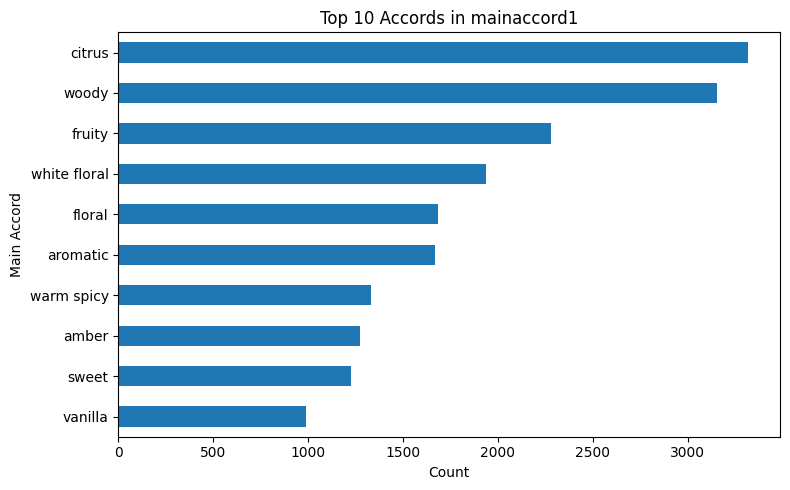

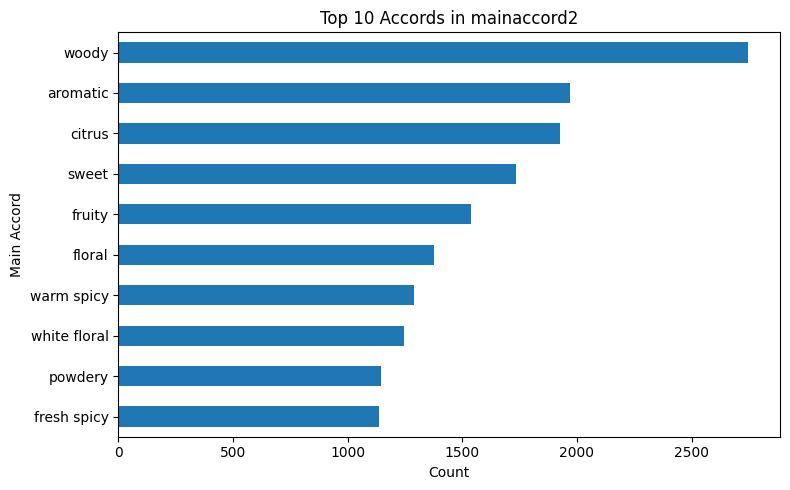

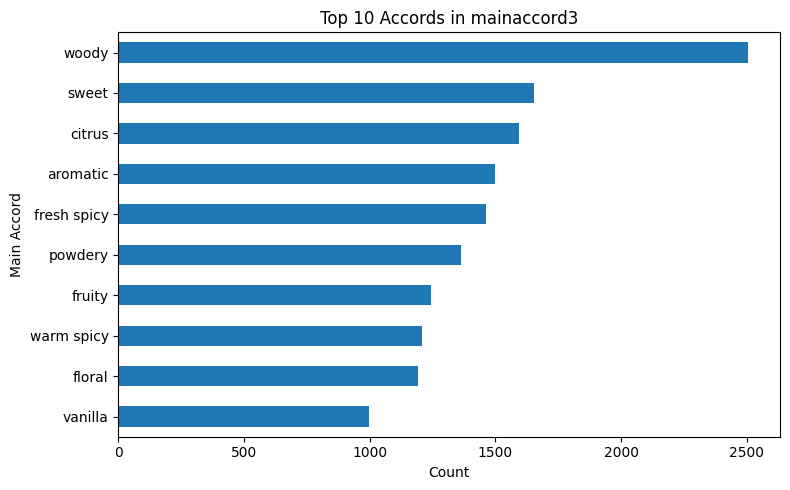

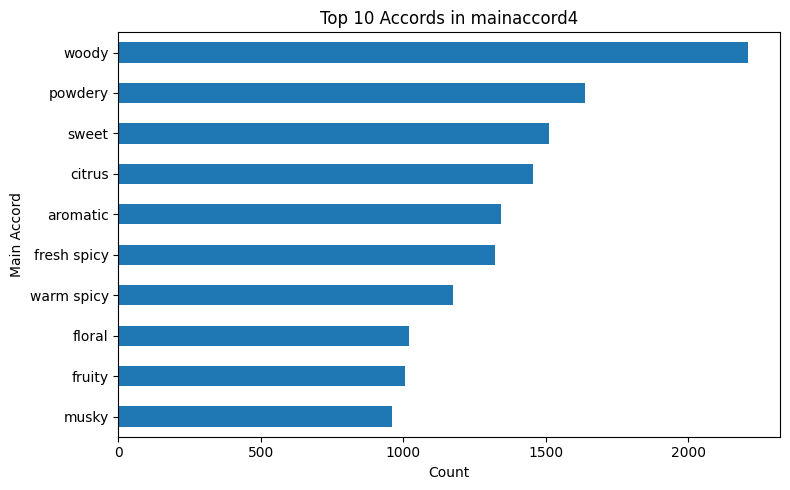

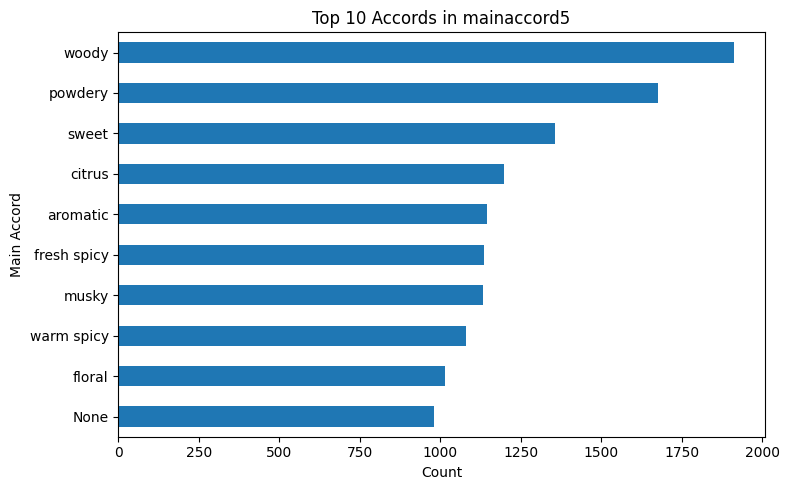

In [ ]:
import matplotlib.pyplot as plt

accord_cols = ['mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5']

for col in accord_cols:
    counts = df[col].value_counts().head(10)

    plt.figure(figsize=(8, 5))
    counts.sort_values().plot(kind='barh')
    plt.title(f'Top 10 Accords in {col}')
    plt.xlabel('Count')
    plt.ylabel('Main Accord')
    plt.tight_layout()
    plt.show()

#### Mainaccord 통합 분포 Top15

In [ ]:
all_accords = pd.concat([
    df['mainaccord1'],
    df['mainaccord2'],
    df['mainaccord3'],
    df['mainaccord4'],
    df['mainaccord5']
])

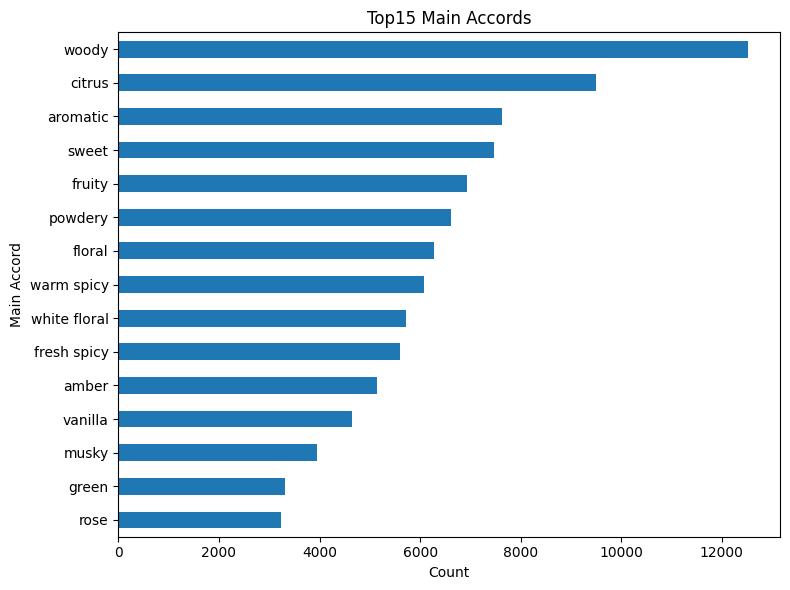

In [ ]:
import matplotlib.pyplot as plt

combined_counts = all_accords.value_counts().head(15)

plt.figure(figsize=(8, 6))
combined_counts.sort_values().plot(kind='barh')
plt.title('Top15 Main Accords')
plt.xlabel('Count')
plt.ylabel('Main Accord')
plt.tight_layout()
plt.show()

#### Category 별 분포

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cat_cols = ['Category_1', 'Category_2', 'Category_3', 'Category_4', 'Category_5']

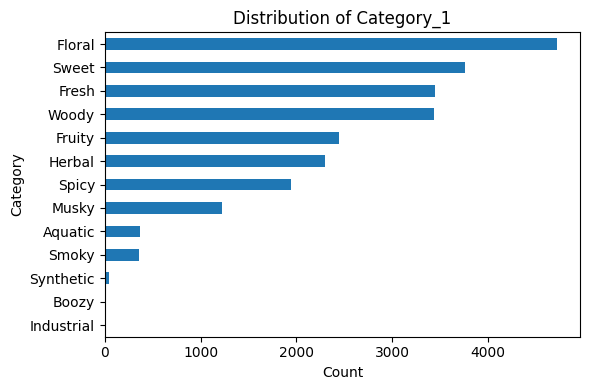

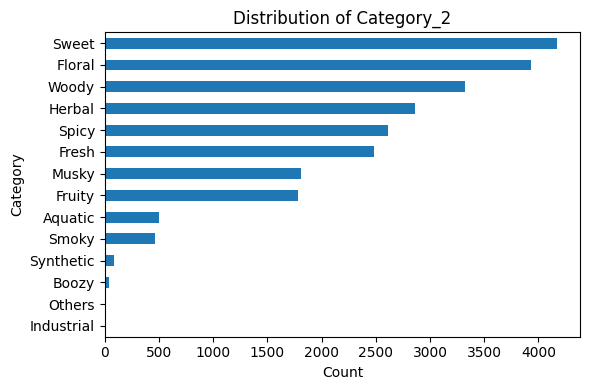

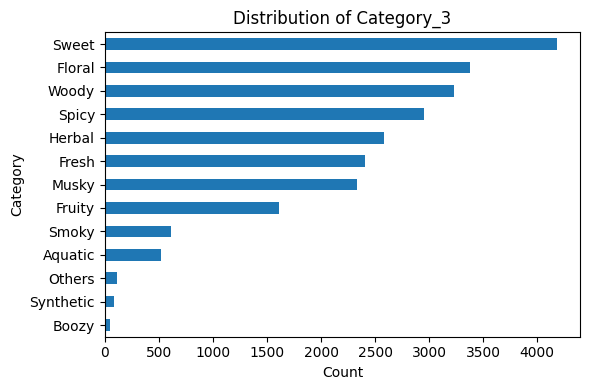

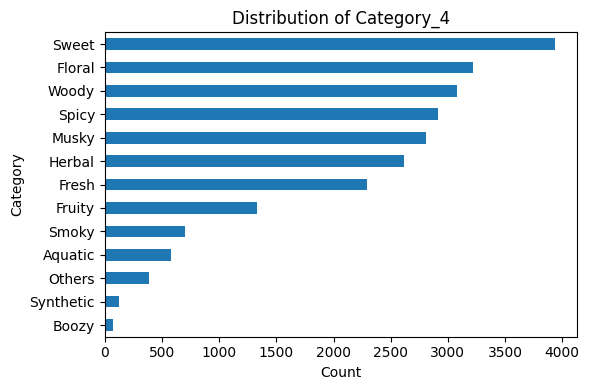

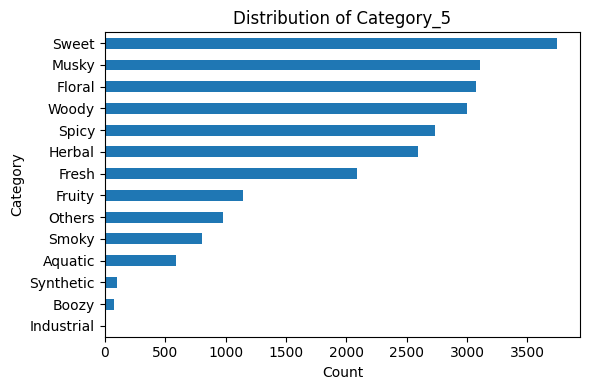

In [ ]:
for col in cat_cols:
    counts = df[col].value_counts()

    plt.figure(figsize=(6, 4))
    counts.sort_values().plot(kind='barh')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

#### Category 통합 분포

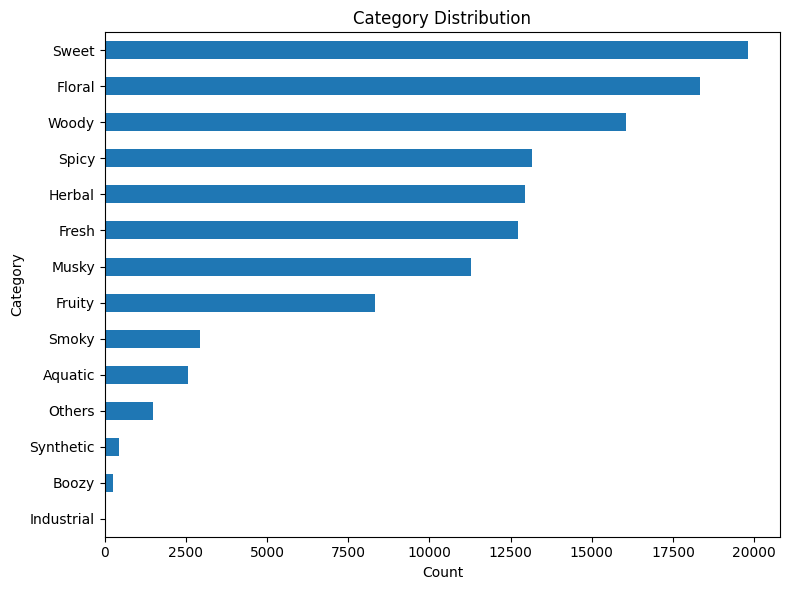

In [ ]:
all_categories = pd.concat([df[col] for col in cat_cols])

category_counts = all_categories.value_counts()

plt.figure(figsize=(8, 6))
category_counts.sort_values().plot(kind='barh')
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

###[2-3] 추가적인 수동 매핑
#### 계절 수동 매핑
- Spring: "Floral", "Herbal", "Fruity", "Fresh"
- Summer: "Fresh", "Aquatic", "Fruity"
- Autumn: "Woody", "Herbal", "Spicy", "Boozy"
- Winter: ["Sweet", "Musky", "Spicy", "Boozy", "Smoky"]
- All: "Synthetic", "Industrial", "Musky", "Others"



#### 무드(감정) 수동 매핑
- Kaggle에서 외부 데이터인 EGG 데이터를 이용하여 Aroma Note 별 Mood 수동 매핑
  - Refreshing & Active
: Citrus / Hesperidic
Bergamot, Lemon, Mandarin, Lime, Yuzu, Grapefruit

  -> Beta 증가 / Alpha 감소: 각성(Arousal) 상태 유도, 시트러스 베르가미아 오일의 이완 및 집중력 향상 효과

  - Lovely & Romantic:
Soft Floral / Fruity
Peony, Pink Pepper, Freesia, Cherry Blossom, Apple, Peach

  -> Left Frontal 활성화: 긍정적 접근 행동 유도, 우울감 감소. 달콤하고 가벼운 플로럴의 기분 전환 효과

  - Elegant & Noble:
Floral Bouquet
Jasmine, Rose, Lily-of-the-valley, Magnolia, Tuberose
    
  -> Theta 증가: 웰빙 감각 및 로맨틱한 기분 고취. 복합적인 플로럴 향의 정서적 풍요로움 제공

  - Natural & Calm:
Green / Herbal
Lavender, Green notes, Chamomile, Tea, Mint, Rosemary

  -> Alpha 1 감소 / Fast Alpha 증가: 스트레스 완화 및 뇌의 조화로운 안정 상태. 라벤더의 진정(Relaxing) 및 이완 효과.

  - Sophisticated & Steady
Woody / Aromatic
Cedar, Sandalwood, Patchouli, Vetiver, Oakmoss, Sage

  -> Theta 감소: 경계심(Alertness) 강화, VDT(모니터 작업) 시각 피로 및 정신 건강 장애 방지.
  - Sensual & Bold
Oriental / Spicy
Saffron, Cardamom, Black Pepper, Ginger, Oud, Cinnamon

  -> Fast Alpha/Beta 변화: 고도의 아로마 오일이 유도하는 집중력과 감각적 자극. 강렬한 에너지와 긴장 완화의 공존.

- Warm & Cozy:
Musky / Powdery
Musk, Amber, Orris Root, Cotton Flower, Ambrette
  
  -> Alpha 1 감소 (Parietal): 피실험자가 가장 편안함(Comfortable)을 느끼는 상태. 심리적 안정감과 정서적 지지 제공.

- Sweet & Playful:
Gourmand / Sweet
Vanilla, Caramel, Praline, Honey, Chocolate, Coconut
  
  -> Theta 변화 (Vanilla): 뇌의 보상 회로와 관련된 반응. 즐거운 기억 소환 및 생산성 향상 보조.



In [ ]:
import sqlite3
import pandas as pd
import os

# 경로 설정
current_path = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_path, '..', 'data', 'scent.csv')
db_path = os.path.join(current_path, '..', 'data', 'perfume.db')

# 날씨/무드 매핑 테이블
WEATHER_MAP = {
    "Spring": ["Floral", "Herbal", "Fruity", "Fresh"],
    "Summer": ["Fresh", "Aquatic", "Fruity"],
    "Autumn": ["Woody", "Herbal", "Spicy", "Boozy"],
    "Winter": ["Sweet", "Musky", "Spicy", "Boozy", "Smoky"],
    "All": ["Synthetic", "Industrial", "Others"]
}

MOOD_MAP = {
    'Refreshing & Active': ['bergamot', 'lemon', 'mandarin', 'lime', 'yuzu', 'grapefruit', 'citrus'],
    'Lovely & Romantic': ['peony', 'pink pepper', 'freesia', 'cherry blossom', 'apple', 'peach', 'fruity'],
    'Elegant & Noble': ['jasmine', 'rose', 'lily-of-the-valley', 'magnolia', 'tuberose', 'ylang-ylang'],
    'Natural & Calm': ['lavender', 'green notes', 'chamomile', 'tea', 'mint', 'rosemary', 'basil', 'sage'],
    'Sophisticated & Steady': ['cedar', 'sandalwood', 'patchouli', 'vetiver', 'oakmoss', 'cypress', 'guaiac wood'],
    'Sensual & Bold': ['saffron', 'cardamom', 'black pepper', 'ginger', 'oud', 'cinnamon', 'spicy'],
    'Warm & Cozy': ['musk', 'amber', 'orris', 'powdery', 'cotton flower', 'ambrette', 'heliotrope'],
    'Sweet & Playful': ['vanilla', 'caramel', 'praline', 'honey', 'chocolate', 'coconut', 'raspberry', 'strawberry']
}

def calculate_season_scores(row):
    """각 계절별 적합도 점수 산출"""
    scores = {'Spring': 0.1, 'Summer': 0.1, 'Autumn': 0.1, 'Winter': 0.1}

    categories = [str(row[f'Category_{i}']) for i in range(1, 6) if pd.notna(row[f'Category_{i}'])]

    found_any = False
    for cat in categories:
        for season, keywords in WEATHER_MAP.items():
            if season == 'All' and cat in keywords:
                for s in scores:
                    scores[s] += 0.5
                found_any = True
            elif cat in keywords:
                scores[season] += 1
                found_any = True

    total = sum(scores.values())
    if total == 0:
        return {'Spring': 25, 'Summer': 25, 'Autumn': 25, 'Winter': 25}

    result = {s: int((v / total) * 100) for s, v in scores.items() if s in ['Spring', 'Summer', 'Autumn', 'Winter']}

    diff = 100 - sum(result.values())
    if diff != 0:
        max_key = max(result, key=result.get)
        result[max_key] += diff

    return result

def calculate_mood_scientific(row):
    """전성분 스캔을 통한 EEG 근거 기반 무드 결정"""
    all_content = f"{row['Category_1']} {row['Top']} {row['Middle']} {row['Base']}".lower()

    mood_scores = {mood: 0 for mood in MOOD_MAP.keys()}
    for mood, keywords in MOOD_MAP.items():
        for word in keywords:
            if word in all_content:
                mood_scores[mood] += 1

    if max(mood_scores.values()) == 0:
        return 'Modern & Unique'

    return max(mood_scores, key=mood_scores.get)

def build_db():
    if not os.path.exists(csv_path):
        print(f"파일을 찾을 수 없습니다: {csv_path}")
        return

    print("원본 CSV 읽는 중...")
    df = pd.read_csv(csv_path)

    print("계절별 적합도 산출 중...")
    season_data = df.apply(calculate_season_scores, axis=1, result_type='expand')
    df = pd.concat([df, season_data], axis=1)

    print("뇌파 데이터 기반 무드 분석 중...")
    df['mood'] = df.apply(calculate_mood_scientific, axis=1)

    # SQLite DB 저장
    conn = sqlite3.connect(db_path)
    df.to_sql('perfumes', conn, if_exists='replace', index=False)
    conn.close()

    print(f"DB 구축 완료! (위치: {db_path})")

if __name__ == "__main__":
    build_db()

In [ ]:
# 데이터 저장 추출 페이지
import sqlite3
import pandas as pd
import os

def get_data():
    current_dir = os.path.dirname(os.path.abspath(__file__))

    db_path = os.path.join(current_dir, "perfume.db")


    if not os.path.exists(db_path):
        db_path = "perfume.db"

    try:
        conn = sqlite3.connect(db_path)
        query = "SELECT * FROM perfumes"
        df = pd.read_sql(query, conn)
        conn.close()
        return df
    except Exception as e:
        raise Exception(f"DB 파일 로드 실패 (경로: {db_path}): {e}")
    return df

###[3] 추천 모델 생성
- 전체적인 텍스트 데이터 결측치를 다시 한번 확인 후 결측치 처리 진행
  - NA를 '' (빈칸)으로 변경
- 특정한 특징에 가중치 부여
  - 사용자가 느낄 때 향의 중심이 되는 첫 번째 카테고리(Mainaccord)와 뇌파 근거가 존재하는 무드에 가중치 부여
    - 사용자가 느끼는 감정과 향에 중심이 되도록 설정함
- TF-IDF 벡터화 수행
  - 모델 학습을 수행한 후 전체 향수의 프로필을 생성
- 성별 및 계절 필터링 수행
- 해당 필터링된 데이터에 한하여 TF-IDF 매트릭스 추출
- 사용자로부터 입력 받은 쿼리 벡터화 진행
- 코사인 유사도를 산출하여 최종 점수 산출
- 점수를 기준으로 높은 점수부터 필터링 수행 후 상위 5개의 향수 추천  
  - 만일 동일한 점수의 경우, fra_cleaned.csv 에 존재하는 랭킹 점수를 기반으로 랭킹이 높은 순으로 정렬되도록 함

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class PerfumeRecommender:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
        self.tfidf_matrix = None
        self.df = None

    def _prepare_features(self, df):
        temp_df = df.copy()

        # 1. 텍스트 데이터 결측치 처리
        text_cols = ['Category_1', 'Category_2', 'Category_3', 'mood', 'Gender', 'mainaccord1', 'Top', 'Middle', 'Base']
        for col in text_cols:
            temp_df[col] = temp_df[col].fillna('').astype(str).str.lower()

        # 2. 특징 가중치 부여
        def combine_soup(row):
            # 향의 중심이 되는 첫 번째 카테고리와 뇌파 근거가 존재하는 무드에 높은 가중치 부여
            soup = (row['Category_1'] + " ") * 3 + \
                   (row['mood'] + " ") * 3 + \
                   f"{row['Top']} {row['Middle']} {row['mainaccord1']}"
            return soup.strip()

        return temp_df.apply(combine_soup, axis=1)

    def fit(self, df):
        self.df = df
        soup = self._prepare_features(df)
        self.tfidf_matrix = self.vectorizer.fit_transform(soup)
        print(f"모델 학습 완료: {self.tfidf_matrix.shape[0]}개의 향수 프로필 생성")

    def get_recommendations(self, user_cats, user_gender, user_weather, user_mood, top_n=5):
        # 1. 성별 필터링
        user_gender_lower = user_gender.lower()
        gender_mask = self.df['Gender'].str.lower().str.contains(f"{user_gender_lower}|unisex", na=False)
        filtered_df = self.df[gender_mask].copy()

        if filtered_df.empty:
            return pd.DataFrame()

        # 2. 사용자가 선택한 계절이 가장 높은 비중을 차지하는 경우만 필터링
        seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
        filtered_df['top_season'] = filtered_df[seasons].idxmax(axis=1)
        filtered_df = filtered_df[filtered_df['top_season'] == user_weather]

        if filtered_df.empty:
            return pd.DataFrame()

        # 3. 필터링된 데이터에 해당하는 TF-IDF 매트릭스 추출
        filtered_indices = filtered_df.index
        filtered_tfidf = self.tfidf_matrix[filtered_indices]

        # 4. 사용자 입력 쿼리 벡터화
        user_query = " ".join([cat for cat in user_cats for _ in range(3)])
        user_query += f" {(user_mood + ' ') * 2} {user_weather}"
        query_vec = self.vectorizer.transform([user_query.lower()])

        # 5. 코사인 유사도 계산
        sim_scores = cosine_similarity(query_vec, filtered_tfidf).flatten()

        # 6. 최종 점수 산출
        season_bonus = filtered_df[user_weather].fillna(0).values / 100.0
        normalized_rating = filtered_df['Rating Value'].fillna(0).values / 5.0
        final_scores = (sim_scores * 0.7) + (season_bonus * 0.2) + (normalized_rating * 0.1)

        # 7. 정렬 및 상위 5개 추출
        top_local_indices = final_scores.argsort()[::-1][:top_n]
        results = filtered_df.iloc[top_local_indices].copy()

        current_top_scores = final_scores[top_local_indices]
        if len(current_top_scores) > 0 and current_top_scores[0] > 0:
            max_val = current_top_scores[0]
            results['match_score'] = [round((s / max_val) * 100) for s in current_top_scores]
        else:
            results['match_score'] = 0

        return results


###[4] 향수 추천 시스템 프로토타입 구현
- gradio를 이용하여 간단한 프로토타입을 구현하고자 함
- 사용자로부터 입력받을 입력값을 버튼 타입 형식으로 직접 지정하도록 한 뒤, 분석을 수행하면 구현한 모델이 수행되도록 함
- 분석 결과는 카드 타입으로 보여지도록 함
  - 해당 향수가 가진 계절 특징과 category 비중을 시각화
  - 뇌파의 특징을 간단하게 요약하여 특징이 보이도록 구현
  - 최종 점수의 일치율이 나타나도록 함
  - 해당 향수의 탑, 미들, 베이스의 향에 어떤 Aroma가 구성되어 있는지 보이도록 함  


In [ ]:
import gradio as gr
import os
import sys
import pandas as pd

# 1. 경로 설정 및 모듈 임포트
current_path = os.path.dirname(os.path.abspath(__file__))
if current_path not in sys.path:
    sys.path.append(current_path)

from repository import get_data
from model import PerfumeRecommender

# 2. 데이터 로드 및 모델 학습
print("모델 초기화 중...")
try:
    df = get_data()
    all_categories = sorted([c for c in df['Category_1'].unique() if str(c) != 'nan'])
    recommender = PerfumeRecommender()
    recommender.fit(df)
    print("모델 준비 완료!")
except Exception as e:
    print(f"초기화 중 에러 발생: {e}")
    all_categories = []

# 3. 결과 출력을 위한 전문 분석 리포트 포맷 함수
def format_result_card(row, selected_mood, selected_season):
    icon_url = "https://cdn-icons-png.flaticon.com/512/3012/3012423.png"

    mood_explanations = {
        'Refreshing & Active': "시트러스 계열 성분이 <b>Beta파를 활성화</b>하여 인지 효율과 각성 상태를 최적화합니다.",
        'Lovely & Romantic': "소프트 플로럴 향취가 <b>좌측 전두부(Left Frontal)</b>를 자극하여 긍정적 정서를 고취합니다.",
        'Elegant & Noble': "풍성한 화이트 플로럴이 <b>Alpha 1파의 안정화</b>를 도와 고귀하고 우아한 정서를 형성합니다.",
        'Natural & Calm': "허브의 Linalool 성분이 <b>안정적 Alpha파</b>를 유도하여 뇌의 피로도를 낮추고 이완을 돕습니다.",
        'Sophisticated & Steady': "우디 노트가 <b>Theta파를 조절</b>하여 지적 예리함을 유지하고 시각적 피로를 방지합니다.",
        'Sensual & Bold': "스파이시 자극이 <b>신경전달물질의 활성</b>을 도와 감각적 자신감과 에너지를 부여합니다.",
        'Warm & Cozy': "머스크 분자가 <b>변연계(Limbic System)</b>에 작용하여 심리적 안도감과 편안함을 선사합니다.",
        'Sweet & Playful': "구르망 성분이 <b>도파민 보상 회로</b>를 자극하여 즉각적인 기분 전환과 활력을 제공합니다."
    }
    explanation = mood_explanations.get(selected_mood, "성분 분석 결과, 당신의 상태와 높은 조화를 보입니다.")

    # Category 비중 분석
    categories = [str(row.get(f'Category_{i}')) for i in range(1, 6) if pd.notna(row.get(f'Category_{i}')) and str(row.get(f'Category_{i}')) != 'nan' and str(row.get(f'Category_{i}')) != '']
    cat_counts = pd.Series(categories).value_counts()
    total_cats = len(categories) if len(categories) > 0 else 1

    category_profile_html = ""
    for cat, count in cat_counts.items():
        percentage = int((count / total_cats) * 100)
        category_profile_html += f"""
        <div style="margin-bottom: 8px;">
            <div style="display: flex; justify-content: space-between; font-size: 0.75em; color: #666; margin-bottom: 2px;">
                <span style="font-weight: 600;">{cat}</span>
                <span>{percentage}%</span>
            </div>
            <div style="width: 100%; height: 6px; background: #F5F5F5; border-radius: 3px; overflow: hidden;">
                <div style="width: {percentage}%; height: 100%; background: #FFAB91; opacity: 0.8;"></div>
            </div>
        </div>
        """

    # 4대 계절 비율 시각화
    seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
    season_colors = ["#FFD1DC", "#FFCCBC", "#D7CCC8", "#F8BBD0"]
    season_distribution_html = ""
    for i, s in enumerate(seasons):
        score = row.get(s, 0)
        is_selected = "border: 1.5px solid #D81B60; background: #FFF0F3;" if s == selected_season else ""
        season_distribution_html += f"""
        <div style="flex: 1; text-align: center; padding: 5px; {is_selected} border-radius: 8px;">
            <div style="font-size: 0.6em; color: #888; margin-bottom: 3px;">{s.upper()}</div>
            <div style="width: 100%; height: 20px; background: #F5F5F5; border-radius: 4px; position: relative; overflow: hidden;">
                <div style="width: {score}%; height: 100%; background: {season_colors[i]};"></div>
                <span style="position: absolute; width: 100%; left: 0; top: 2px; font-size: 0.65em; color: #444; font-weight: bold;">{score}%</span>
            </div>
        </div>
        """

    return f"""
    <div class="perfume-card">
        <div class="card-header">
            <div class="header-left">
                <div class="icon-box"><img src="{icon_url}"></div>
                <div>
                    <span class="brand-text">{row['Brand']}</span>
                    <h3 class="perfume-title">{row['Perfume']}</h3>
                </div>
            </div>
            <div class="score-box">
                <div class="score-num">{row['match_score']}<span style="font-size: 0.5em;">%</span></div>
                <div class="score-label">MATCHING</div>
            </div>
        </div>
        <div class="ai-report">
            <p><b>🧠 AI Analytics Report:</b> {explanation}</p>
        </div>
        <div class="analysis-container">
            <div class="analysis-section">
                <div class="section-title">📊 SEASONAL DISTRIBUTION</div>
                <div class="season-flex">{season_distribution_html}</div>
            </div>
            <div class="analysis-section">
                <div class="section-title">🧪 SCENT PROFILE</div>
                <div class="profile-box">{category_profile_html}</div>
            </div>
        </div>
        <div class="notes-container">
            <div class="note-box"><b>TOP</b><br>{str(row['Top'])[:45]}</div>
            <div class="note-box"><b>MIDDLE</b><br>{str(row['Middle'])[:45]}</div>
            <div class="note-box"><b>BASE</b><br>{str(row['Base'])[:45]}</div>
        </div>
    </div>
    """

def recommend_perfume(selected_cats, gender, season, mood):
    if not selected_cats:
        return "<p style='text-align:center; padding: 100px; color:#D81B60; font-weight:bold;'>하나 이상의 선호하는 향기를 선택해주세요!</p>"
    try:
        results = recommender.get_recommendations(selected_cats, gender, season, mood)
        if results.empty:
            return f"<div style='text-align:center; padding: 80px;'><p style='color:#D81B60; font-size:1.2em;'>선택하신 조건에 맞는 향수를 찾을 수 없습니다.</p></div>"

        html_output = '<div class="results-wrapper">'
        for _, row in results.iterrows():
            html_output += format_result_card(row, mood, season)
        html_output += '</div>'
        return html_output
    except Exception as e:
        return f"<p style='text-align:center; padding: 50px; color:red;'>에러 발생: {e}</p>"

# 6. UI 구성
with gr.Blocks(theme=gr.themes.Soft(primary_hue="pink", secondary_hue="rose"), title="Scent AI Curation") as demo:
    gr.HTML("""
        <style>
            * {
                font-family: -apple-system, BlinkMacSystemFont, "Segoe UI", Roboto, "Helvetica Neue", Arial, sans-serif !important;
                letter-spacing: -0.3px;
            }
            .gradio-container {
                background-color: #FFF8F8 !important;
            }
            /* 반응형 래퍼 */
            .results-wrapper { max-width: 850px; margin: 0 auto; padding: 10px; }

            /* 카드 베이스 */
            .perfume-card {
                background: white; border-radius: 20px; padding: 25px; margin-bottom: 30px;
                box-shadow: 0 10px 30px rgba(216, 27, 96, 0.05); border: 1px solid #FCE4EC;
            }
            /* 모바일 -> 점수와 제목 정렬 */
            .card-header { display: flex; justify-content: space-between; align-items: center; border-bottom: 1px solid #FCE4EC; padding-bottom: 15px; margin-bottom: 15px; }
            .header-left { display: flex; align-items: center; gap: 15px; }
            .icon-box { width: 50px; height: 50px; background: #FFF9FA; border-radius: 14px; display: flex; align-items: center; justify-content: center; flex-shrink: 0; }
            .icon-box img { width: 30px; opacity: 0.6; }
            .brand-text { font-size: 0.75em; color: #D81B60; font-weight: 700; }
            .perfume-title { margin: 0; color: #333; font-size: 1.3em; line-height: 1.2; }
            .score-num { font-size: 1.8em; font-weight: 900; color: #D81B60; text-align: right; }
            .score-label { font-size: 0.6em; color: #999; font-weight: bold; text-align: right; }
            /* AI 리포트 */
            .ai-report { background: #FFF9FA; border-radius: 12px; padding: 15px; margin-bottom: 20px; border-left: 5px solid #D81B60; font-size: 0.9em; }
            /* 반응형 분석 섹션*/
            .analysis-container { display: flex; flex-direction: column; gap: 20px; margin-bottom: 20px; }
            @media (min-width: 768px) {
                .analysis-container { flex-direction: row; }
                .analysis-section { flex: 1; }
            }
            .section-title { font-size: 0.8em; font-weight: 700; color: #555; margin-bottom: 10px; }
            .season-flex { display: flex; gap: 5px; }
            .profile-box { background: #FDFDFD; padding: 12px; border-radius: 10px; border: 1px solid #F5F5F5; }
            /* 반응형 노트 페이지*/
            .notes-container { display: grid; grid-template-columns: 1fr; gap: 10px; }
            @media (min-width: 768px) {
                .notes-container { grid-template-columns: 1fr 1fr 1fr; }
            }
            .note-box { background: #FAFAFA; padding: 12px; border-radius: 10px; border: 1px solid #EEE; font-size: 0.8em; color: #666; }

            /* 버튼 스타일 */
            .gr-button-primary {
                background: linear-gradient(135deg, #FFAB91 0%, #D81B60 100%) !important;
                border: none !important; font-weight: 800 !important;
            }
        </style>
    """)

    gr.Markdown("# <span style='color: #D81B60;'>🔎 **Scent AI Curation**</span>")

    with gr.Row():
        with gr.Column(scale=1):
            cat_input = gr.CheckboxGroup(all_categories, label="좋아하는 향기 계열")
            gen_input = gr.Radio(['Women', 'Men', 'Unisex'], label="성별", value='Unisex')
            sea_input = gr.Dropdown(['Spring', 'Summer', 'Autumn', 'Winter'], label="선호하는 계절", value='Spring')
            moo_input = gr.Dropdown(['Refreshing & Active', 'Lovely & Romantic', 'Elegant & Noble', 'Natural & Calm', 'Sophisticated & Steady', 'Sensual & Bold', 'Warm & Cozy', 'Sweet & Playful'], label="심리적 무드", value='Natural & Calm')
            submit_btn = gr.Button("분석 시작✨", variant="primary")

        with gr.Column(scale=2):
            output_html = gr.HTML(value="<div style='text-align:center; padding: 100px; color:#ddd; border: 2px dashed #FCE4EC; border-radius: 20px;'>결과 리포트가 여기에 표시됩니다.</div>")

    submit_btn.click(recommend_perfume, [cat_input, gen_input, sea_input, moo_input], output_html)

if __name__ == "__main__":
    demo.launch(share=True)

###[5] 최종 화면 및 해당 프로토타입 링크 공유
- 링크: https://huggingface.co/spaces/muun00/scent-ai-curation
- 프로토타입 실행시 아래와 같은 화면으로 분석 수행

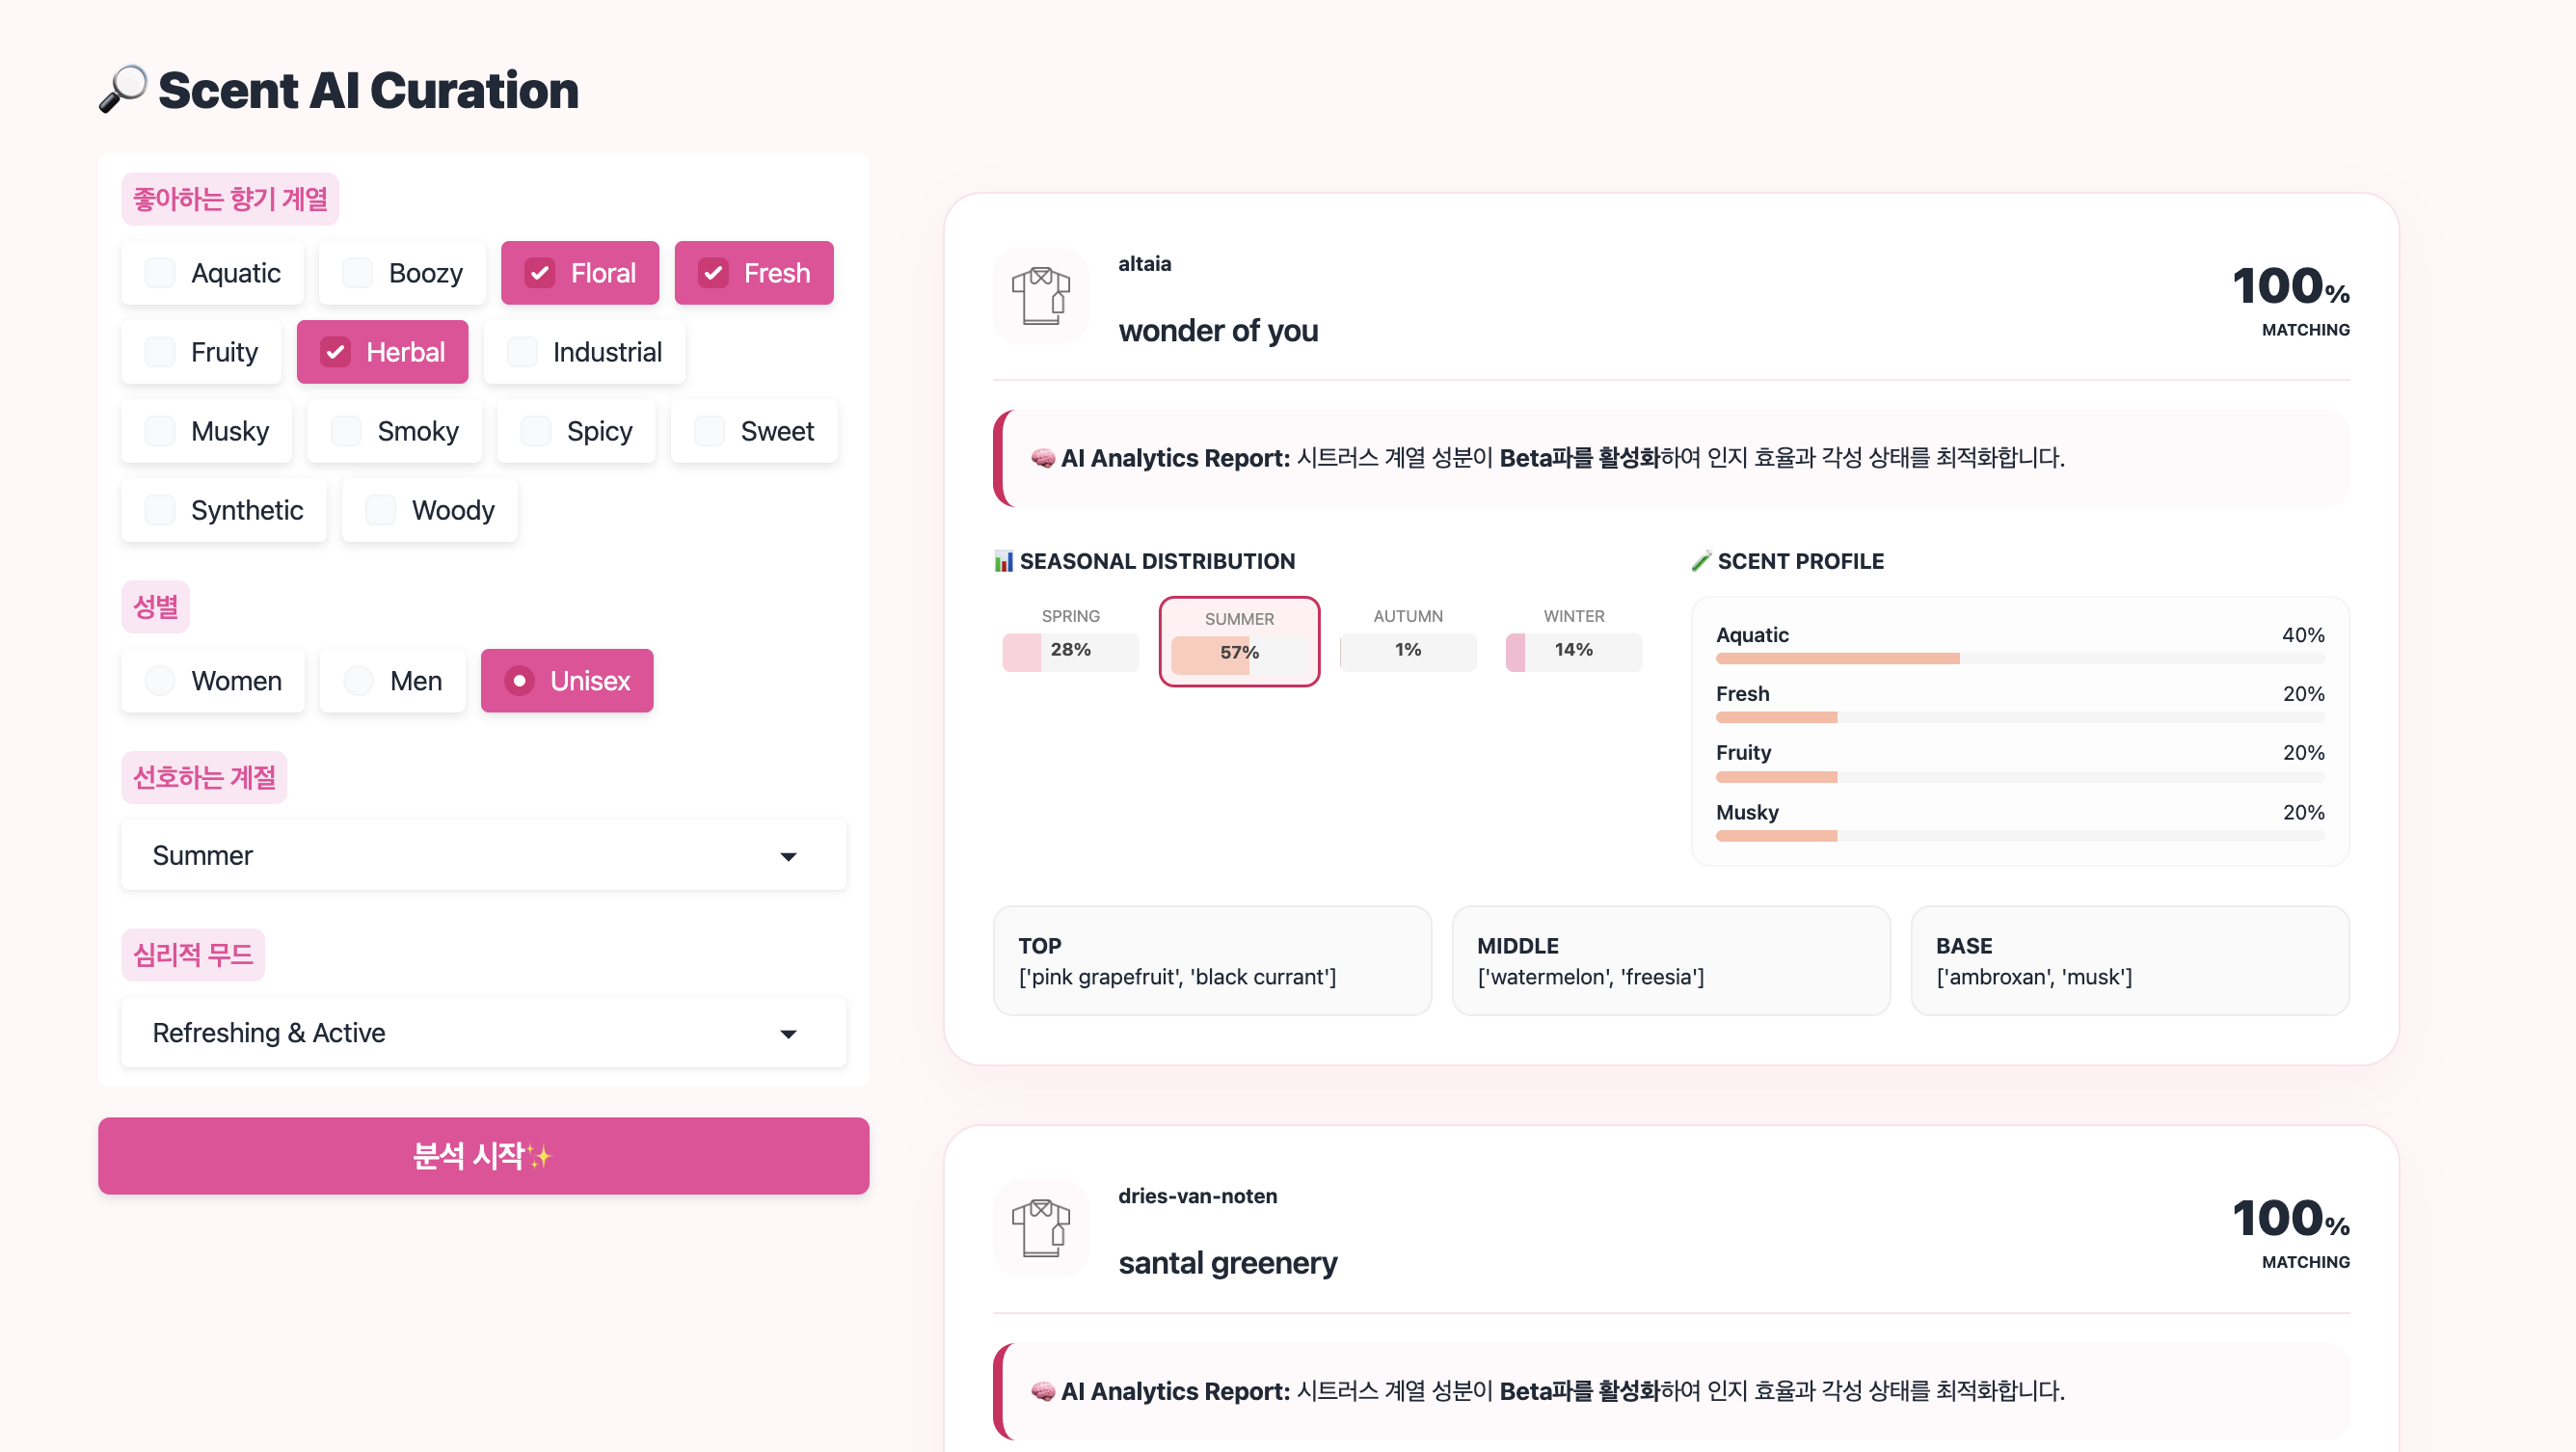

###[6] 한계점 및 보완 방향 제시
- 데이터 측면의 한계
  - 수동 매핑의 주관성: Main Accord를 카테고리로 분류하고 무드를 매핑하는 과정에서 주관이 개입되었음
  - 개선 방향: 향후 더 대규모의 향수 리뷰 데이터를 학습시켜 실제 사용자들이 느끼는 집단 지성 기반의 무드를 자동 추출하는 방식이 필요함
  - EEG 데이터의 일반화 오류: 특정 아로마 노트와 뇌파의 상관관계는 개인의 경험이나 문화권에 따라 다를 수 있음
  - 개선 방향: 개인별 선호도 피드백을 학습하는 온라인 학습 시스템을 도입하여 개인 맞춤형 무드 매핑의 정교화가 필요함
- 알고리즘 및 기술적 한계
  - TF-IDF의 문맥 이해 부족: 단순 단어 빈도 기반의 TF-IDF는 향기 노트 간의 복합적인 조화나 문맥적 의미를 완벽히 포착하기 어렵다는 한계점이 존재
  - 개선 방향: 향후 BERT나 RoBERTa 같은 언어 모델이나 Word2Vec,Doc2Vec을 사용하여 향기 노트 간의 유사도를 벡터 공간에서 더 정밀하게 계산해 보고자 함
  - 콜드 스타트 문제: 신규 향수나 데이터가 적은 향수는 추천 성능이 저하될 가능성 존재
- 서비스 체감 및 확장성
  - 시각 위주의 정보 전달: 향수는 후각의 영역이나 현재 시스템은 시각 정보와 주어진 단어 정보에만 의존
  - 개선 방향: 향수의 느낌을 나타내는 이미지를 생성형 AI로 생성하여 함께 보여준다면 사용자가 향을 상상하는 데 더 큰 도움을 줄 것으로 예상됨
  - 가중치 로직의 단순함: 현재 7:2:1의 가중치는 주관이 개입된 수치임
  - 개선 방향: 사용자 A/B 테스트를 통해 만족도가 가장 높은 최적의 가중치 조합을 찾아내는 Hyperparameter Tuning 과정이 수행되어야 더욱 정교한 모델 생성이 가능함  